<a href="https://colab.research.google.com/github/Mando2610/Telco-Customer-churn-Propensity-ML-Model/blob/main/TelcoChurnPropensityModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# from google.colab import files

# uploaded = files.upload()
# uploaded

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


{'WA_Fn-UseC_-Telco-Customer-Churn (1).csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check

STEP 1 : Data Collection

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Shape:", df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/tmp/ipython-input-4051529310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


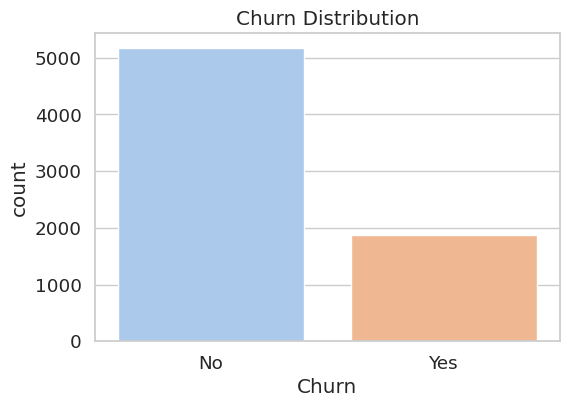

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [57]:
# --- 4. Target Distribution (Churn Yes/No) ---
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)

In [58]:
# --- 5. Data Cleaning ---
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("Missing in TotalCharges:", df["TotalCharges"].isna().sum())

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

Missing in TotalCharges: 11


/tmp/ipython-input-2854809499.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


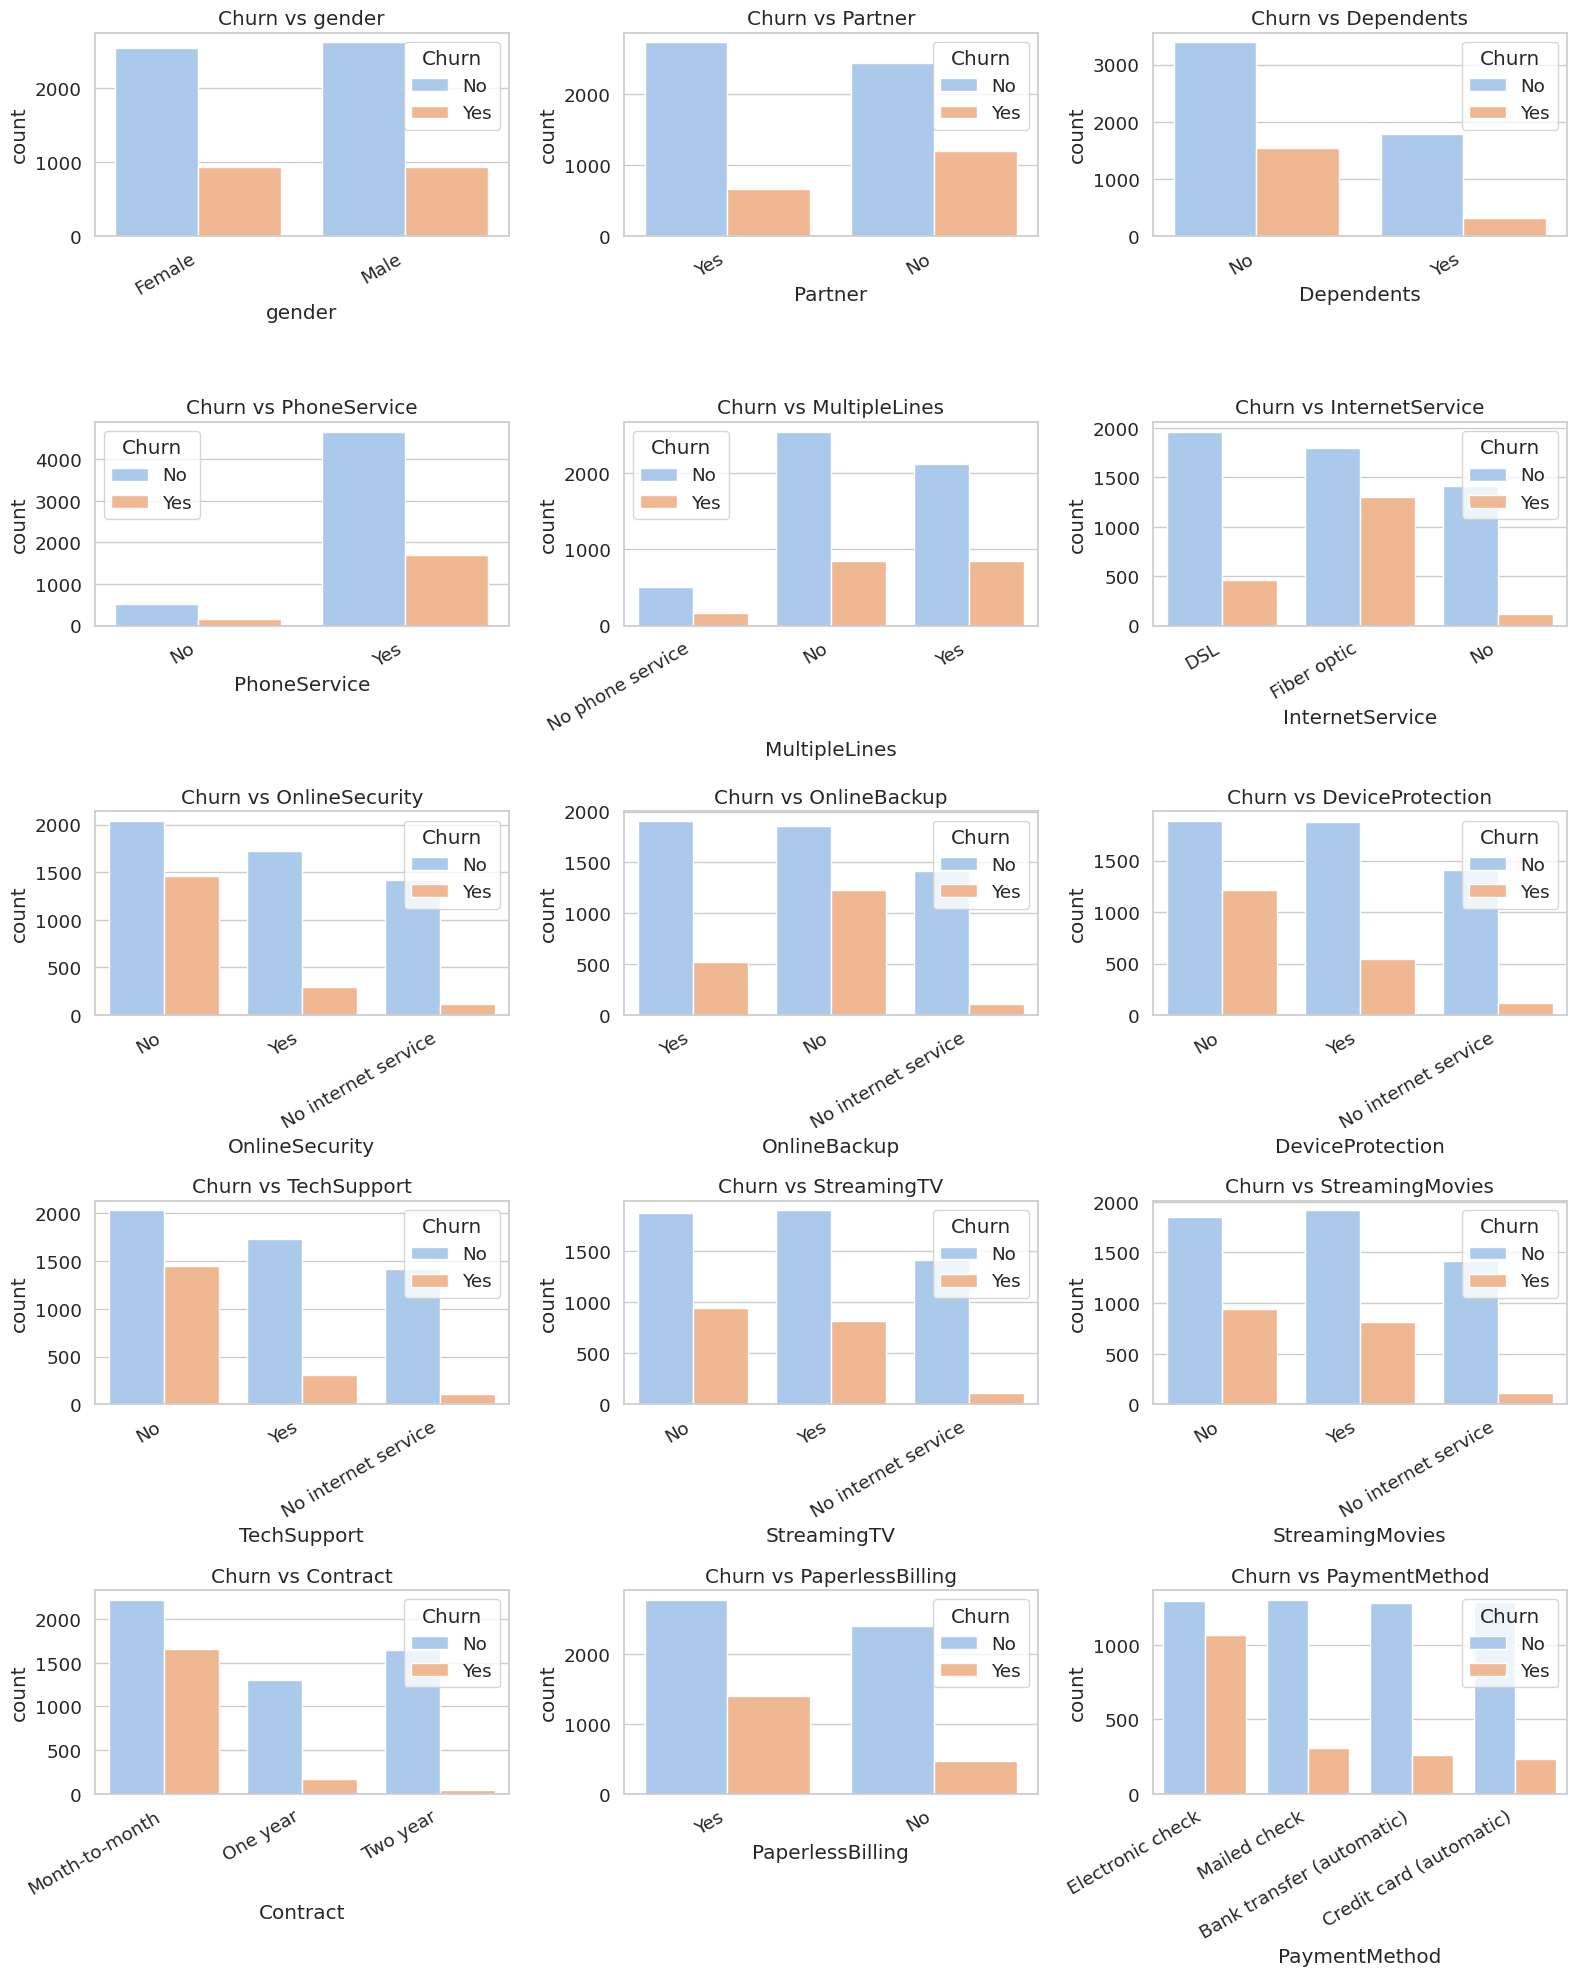

In [59]:
# --- 6. Churn vs Categorical Variables ---
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove("customerID")
cat_cols.remove("Churn")

plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=col, hue="Churn", data=df, palette="pastel")
    plt.xticks(rotation=30, ha="right")
    plt.title(f"Churn vs {col}")
plt.tight_layout()
plt.show()


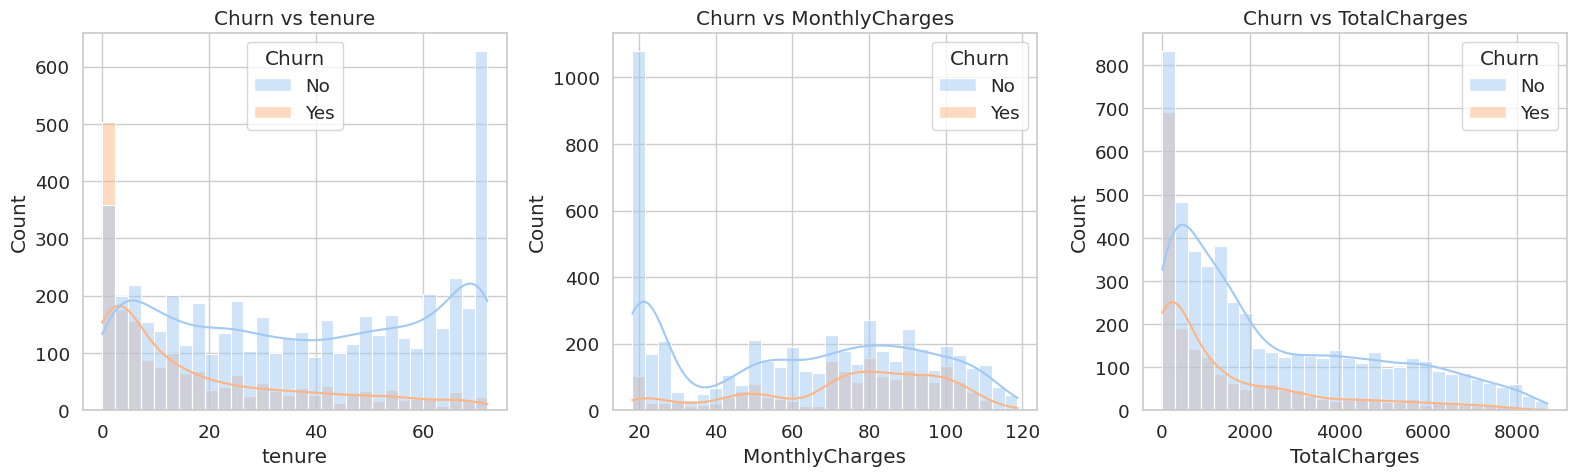

In [60]:
# --- 7. Churn vs Numerical Variables ---
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(16, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, hue="Churn", bins=30, kde=True, palette="pastel")
    plt.title(f"Churn vs {col}")
plt.tight_layout()
plt.show()

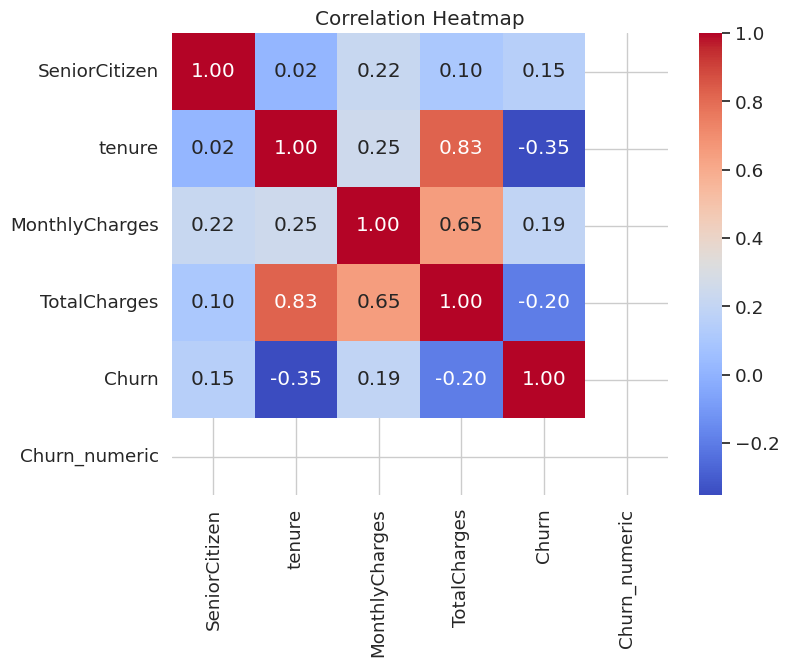

In [61]:
# --- 8. Correlation Heatmap (Numerical) ---

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(8,6))

df["Churn_numeric"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
corr = df[num_cols + ["Churn_numeric"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [62]:
# --- 9. First Insights ---

print("Average tenure of churned customers:", df[df["Churn"]==1]["tenure"].mean())
print("Average tenure of retained customers:", df[df["Churn"]==0]["tenure"].mean())

Average tenure of churned customers: 17.979133226324237
Average tenure of retained customers: 37.56996521066873


STEP 2: Data Preprocessing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️ Load data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2️ Handle missing values
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 3️ Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Churn'])

# 4️ One-hot encode
df_encoded = pd.get_dummies(df, drop_first=True)

# 5️ Train-test split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6️ Scale numeric features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Data ready for modeling!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Data ready for modeling!
Train shape: (5634, 7072)
Test shape: (1409, 7072)


STEP 3: BASELINE MODEL a. Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8034066713981547
Random Forest F1 Score: 0.5665101721439749


STEP 4 : ADV MODEL - XGBoost Classifier

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7849538679914834
XGBoost F1 Score: 0.5689900426742532


           Model  Accuracy  F1 Score
0  Random Forest  0.803407   0.56651
1        XGBoost  0.784954   0.56899


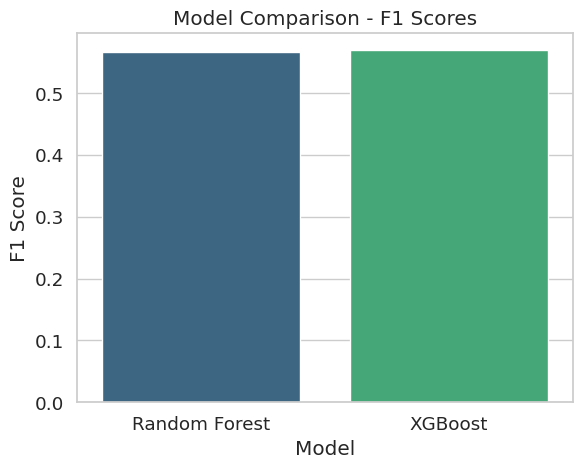

In [66]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
})

print(results)
# sns.barplot(data=results, x='Model', y='F1 Score', palette='viridis')
sns.barplot(data=results, x='Model', y='F1 Score', hue='Model', palette='viridis', legend=False)
plt.title("Model Comparison - F1 Scores")
plt.show()

STEP 5 : FEATURE IMPORTANCE

5.1 Random Forest Feature importance scaling

/tmp/ipython-input-2140616791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='mako')


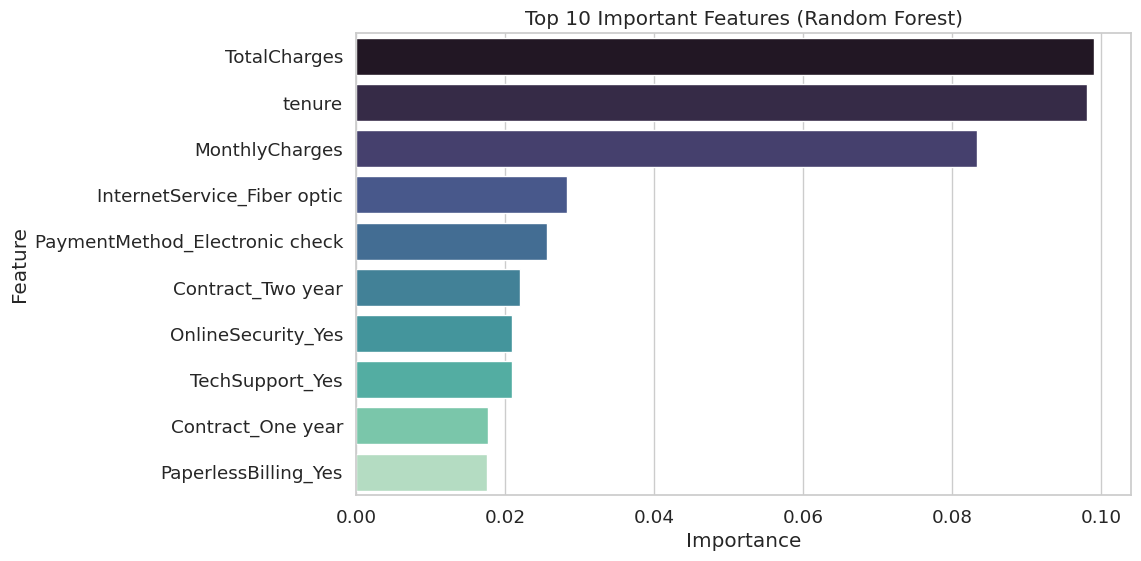

In [67]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='mako')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


5.2 XGBoost feature importance scaling

/tmp/ipython-input-749490425.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='coolwarm')


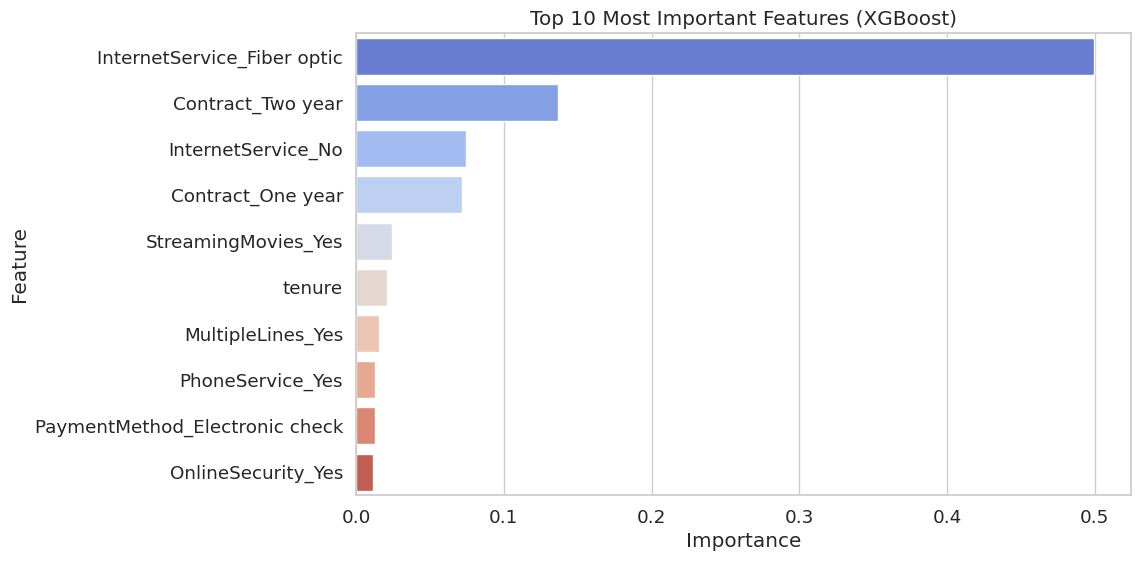

In [68]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 10 Most Important Features (XGBoost)")
plt.show()

SHAP Features

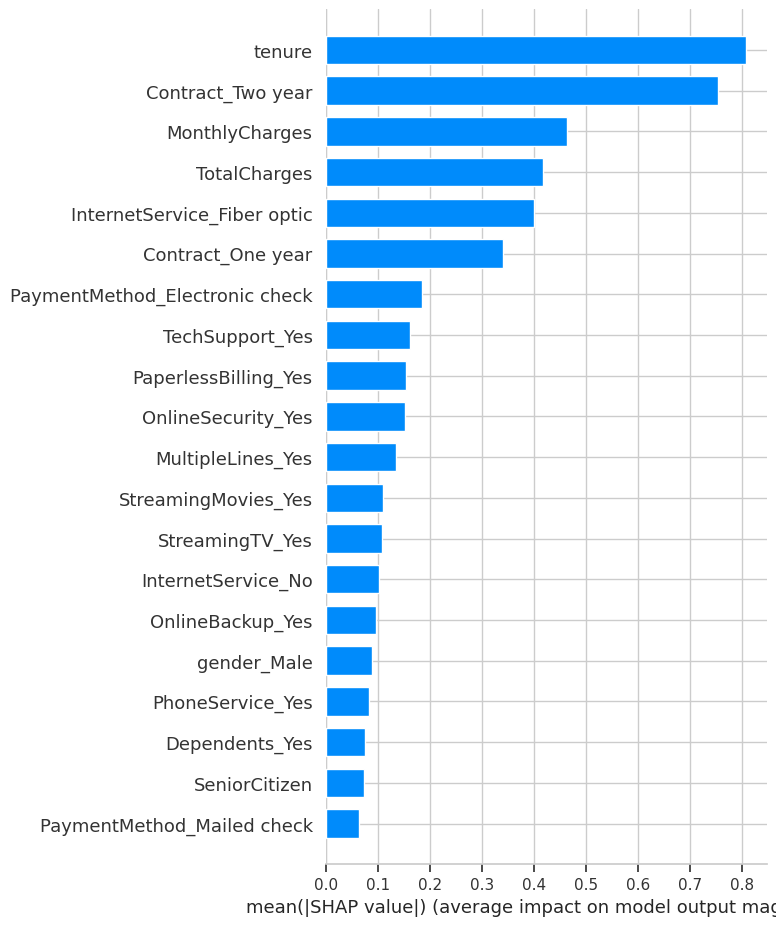

In [69]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgb)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

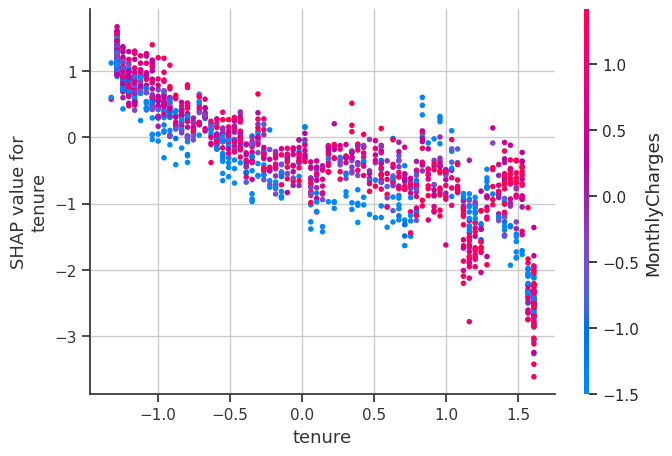

In [70]:
#SHAP Feature dependence

shap.dependence_plot("tenure", shap_values, X_test, interaction_index="MonthlyCharges")

Git

In [74]:
!git config --global user.email "spatarsim2004@gmail.com"
!git config --global user.name "Mando2610"

In [77]:
import getpass
token = getpass.getpass('Enter your GitHub token: ')

Enter your GitHub token: ··········


In [78]:
!git clone https://{token}@github.com/Mando2610/Telco-Customer-churn-Propensity-ML-Model.git

Cloning into 'Telco-Customer-churn-Propensity-ML-Model'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 6), reused 4 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 841.73 KiB | 21.04 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [79]:
!cp "/content/TelcoChurnPropensityModel.ipynb" "/content/Telco-Customer-churn-Propensity-ML-Model/"
%cd /content/Telco-Customer-churn-Propensity-ML-Model

/content/Telco-Customer-churn-Propensity-ML-Model


In [80]:
!git add TelcoChurnPropensityModel.ipynb
!git commit -m "Added Telco Churn Propensity Model notebook"
!git push https://{token}@github.com/Mando2610/Telco-Customer-churn-Propensity-ML-Model.git main


On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Telco-Customer-churn-Propensity-ML-Model/

nothing added to commit but untracked files present (use "git add" to track)
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 162.81 KiB | 3.54 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/Mando2610/Telco-Customer-churn-Propensity-ML-Model.git
   701d621..5896e94  main -> main
